### 1. Configuración del Entorno

In [7]:
import pandas as pd
from pandas import get_option
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

#### Configuraciones para visualización

In [7]:
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-pastel') 
pd.set_option('display.max_columns', None) 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### 2. Carga de Datos

In [8]:
file_path = '../csv/healthcare-dataset-stroke-data.csv'
try:
    df = pd.read_csv(file_path)
    print(f"Dataset cargado exitosamente desde: {file_path}")
    print(f"Dimensiones iniciales del dataset: {df.shape[0]} filas y {df.shape[1]} columnas.")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta especificada: {file_path}")
    print("Por favor, verifica la ruta y asegúrate de que el archivo 'healthcare-dataset-stroke-data.csv' exista en la carpeta 'csv' del proyecto.")
    df = pd.DataFrame()

Dataset cargado exitosamente desde: ../csv/healthcare-dataset-stroke-data.csv
Dimensiones iniciales del dataset: 5110 filas y 12 columnas.


### 3. Inspección Inicial del Dataset

In [9]:
if not df.empty:
    print("Primeras 5 filas del dataset:")
    display(df.head())

    print("\nÚltimas 5 filas del dataset:")
    display(df.tail())

    print("\nInformación general del dataset (tipos de datos, valores no nulos):")
    df.info()
else:
    print("El DataFrame está vacío. No se puede realizar la inspección inicial.")

Primeras 5 filas del dataset:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000,0,1,Yes,Private,Urban,228.690,36.600,formerly smoked,1
1,51676,Female,61.000,0,0,Yes,Self-employed,Rural,202.210,NaN,never smoked,1
2,31112,Male,80.000,0,1,Yes,Private,Rural,105.920,32.500,never smoked,1
3,60182,Female,49.000,0,0,Yes,Private,Urban,171.230,34.400,smokes,1
4,1665,Female,79.000,1,0,Yes,Self-employed,Rural,174.120,24.000,never smoked,1



Últimas 5 filas del dataset:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.000,1,0,Yes,Private,Urban,83.750,NaN,never smoked,0
5106,44873,Female,81.000,0,0,Yes,Self-employed,Urban,125.200,40.000,never smoked,0
5107,19723,Female,35.000,0,0,Yes,Self-employed,Rural,82.990,30.600,never smoked,0
5108,37544,Male,51.000,0,0,Yes,Private,Rural,166.290,25.600,formerly smoked,0
5109,44679,Female,44.000,0,0,Yes,Govt_job,Urban,85.280,26.200,Unknown,0



Información general del dataset (tipos de datos, valores no nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Observaciones iniciales de `df.info()`:
`id`: Tipo `int64`. Es un identificador único, probablemente no útil para la predicción.
`gender`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`: Son de tipo `object`, indicando que son categóricas.
`age`, `avg_glucose_level`, `bmi`: Son numéricas (float64).
`hypertension`, `heart_disease`, `stroke`: Son enteras (int64), probablemente binarias (0 o 1). `stroke` es nuestra variable objetivo.
**Valores Faltantes:** `bmi` tiene valores faltantes (se observa en `df.info()`, ej: 5110 entradas totales pero solo 4909 non-null para `bmi`).

In [10]:
if not df.empty:
    print("\nEstadísticas descriptivas para columnas numéricas:")
    display(df.describe())

    print("\nEstadísticas descriptivas para columnas categóricas (object):")
    display(df.describe(include='object'))
else:
    print("El DataFrame está vacío. No se pueden generar estadísticas descriptivas.")


Estadísticas descriptivas para columnas numéricas:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000,5110.000,5110.000,5110.000,5110.000,4909.000,5110.000
mean,36517.829,43.227,0.097,0.054,106.148,28.893,0.049
std,21161.722,22.613,0.297,0.226,45.284,7.854,0.215
min,67.000,0.080,0.000,0.000,55.120,10.300,0.000
25%,17741.250,25.000,0.000,0.000,77.245,23.500,0.000
50%,36932.000,45.000,0.000,0.000,91.885,28.100,0.000
75%,54682.000,61.000,0.000,0.000,114.090,33.100,0.000
max,72940.000,82.000,1.000,1.000,271.740,97.600,1.000



Estadísticas descriptivas para columnas categóricas (object):


,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Observaciones de `df.describe()`:
**age**: Varía desde ~0.08 (bebés) hasta 82 años. La media es de 43.23 años.
**avg_glucose_level**: Amplio rango, desde 55.12 hasta 271.74. Media de 106.15.
**bmi**: Rango desde 10.3 hasta 97.6. La media es de 28.89. **Confirmamos aquí los NaN con `count` siendo menor que el total.**
**hypertension, heart_disease, stroke**: Efectivamente son binarias (min 0, max 1).
**gender**: Tiene 3 valores únicos. Uno de ellos ("Other") es muy infrecuente (solo 1 caso, como se ve en `top` y `freq` si este fuera el más frecuente o si hacemos `value_counts()`).
**smoking_status**: "Unknown" es una categoría a considerar.

### 4. Limpieza y Preprocesamiento de Datos

Abordaremos los problemas identificados: valores faltantes, categorías raras, y transformación de tipos si es necesario
#### 4.1. Manejo de la columna `id`

In [11]:
if not df.empty and 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)
    print("Columna 'id' eliminada.")
    print(f"Nuevas dimensiones del dataset: {df.shape}")
elif 'id' not in df.columns and not df.empty:
    print("La columna 'id' ya no existe en el DataFrame.")
else:
    print("DataFrame vacío, no se puede eliminar la columna 'id'.")

Columna 'id' eliminada.
Nuevas dimensiones del dataset: (5110, 11)


#### 4.2. Manejo de valores faltantes en `bmi`

In [12]:
if not df.empty and 'bmi' in df.columns:
    print(f"Valores faltantes en 'bmi' ANTES de la imputación: {df['bmi'].isnull().sum()}")
    
    bmi_median = df['bmi'].median()
    df['bmi'].fillna(bmi_median, inplace=True)
    
    print(f"Valores faltantes en 'bmi' DESPUÉS de la imputación: {df['bmi'].isnull().sum()}")
    print(f"Mediana de 'bmi' utilizada para la imputación: {bmi_median:.2f}")
else:
    print("DataFrame vacío o columna 'bmi' no encontrada. No se realiza imputación.")

Valores faltantes en 'bmi' ANTES de la imputación: 201
Valores faltantes en 'bmi' DESPUÉS de la imputación: 0
Mediana de 'bmi' utilizada para la imputación: 28.10


C:\Users\Omar\AppData\Local\Temp\ipykernel_33340\1005191306.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(bmi_median, inplace=True)


#### 4.3. Manejo de la categoría "Other" en `gender`.

In [13]:
if not df.empty and 'gender' in df.columns:
    print("Valores únicos y conteos en 'gender' ANTES del manejo:")
    print(df['gender'].value_counts())
    
    # Filtrar filas donde 'gender' no es 'Other'
    initial_rows = len(df)
    df = df[df['gender'] != 'Other']
    rows_after_removal = len(df)
    
    if initial_rows > rows_after_removal:
        print(f"\nSe eliminaron {initial_rows - rows_after_removal} fila(s) con 'gender' = 'Other'.")
        print("Valores únicos y conteos en 'gender' DESPUÉS del manejo:")
        print(df['gender'].value_counts())
    else:
        print("\nNo se encontraron instancias de 'gender' = 'Other' o ya fueron eliminadas.")
else:
    print("DataFrame vacío o columna 'gender' no encontrada.")

Valores únicos y conteos en 'gender' ANTES del manejo:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Se eliminaron 1 fila(s) con 'gender' = 'Other'.
Valores únicos y conteos en 'gender' DESPUÉS del manejo:
gender
Female    2994
Male      2115
Name: count, dtype: int64


#### 4.4. Verificación de filas duplicadas

In [14]:
if not df.empty:
    num_duplicates = df.duplicated().sum()
    print(f"Número de filas duplicadas encontradas: {num_duplicates}")
    
    if num_duplicates > 0:
        df.drop_duplicates(inplace=True)
        print(f"Filas duplicadas eliminadas. Nuevas dimensiones: {df.shape}")
    else:
        print("No hay filas duplicadas en el dataset.")
else:
    print("DataFrame vacío, no se puede verificar duplicados.")

Número de filas duplicadas encontradas: 0
No hay filas duplicadas en el dataset.


#### 4.5. Revisión final de tipos de datos y valores nulos

In [15]:
if not df.empty:
    print("Información del DataFrame después de la limpieza inicial:")
    df.info()
else:
    print("DataFrame vacío.")

Información del DataFrame después de la limpieza inicial:
<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


### 5. Análisis Exploratorio de Datos (EDA) - Visualizaciones
#### 5.1. Análisis de la Variable Objetivo: `stroke`
Es crucial entender la distribución de nuestra variable objetivo.

C:\Users\Omar\AppData\Local\Temp\ipykernel_33340\4078473482.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='stroke', data=df, palette=['#66b3ff','#ff9999'], order=[0,1])


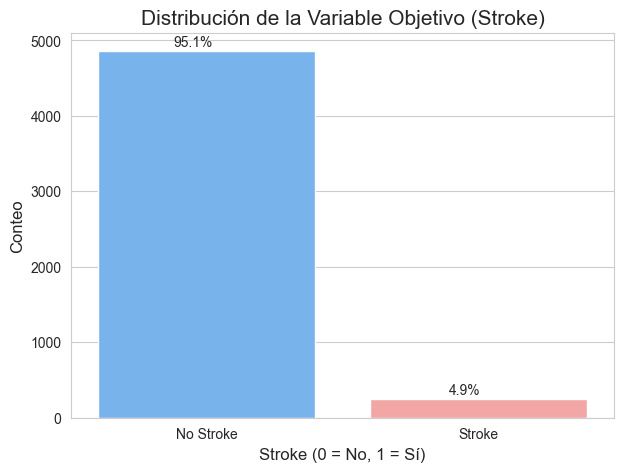

Distribución porcentual de la variable 'stroke':
stroke
0   95.126
1    4.874
Name: proportion, dtype: float64


In [16]:
if not df.empty and 'stroke' in df.columns:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(x='stroke', data=df, palette=['#66b3ff','#ff9999'], order=[0,1])
    plt.title('Distribución de la Variable Objetivo (Stroke)', fontsize=15)
    plt.xlabel('Stroke (0 = No, 1 = Sí)', fontsize=12)
    plt.ylabel('Conteo', fontsize=12)
    plt.xticks([0,1], ['No Stroke', 'Stroke'])
    
    total = len(df['stroke'])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height() + total*0.005 # Offset relativo al total
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
    
    plt.show()

    print("Distribución porcentual de la variable 'stroke':")
    print(df['stroke'].value_counts(normalize=True) * 100)
else:
    print("DataFrame vacío o columna 'stroke' no encontrada.")

#### Observación importante:
Existe un **fuerte desbalance de clases**. La gran mayoría de los registros no tuvieron un ACV. Esto es un punto crítico para el modelado, ya que los modelos pueden tender a predecir la clase mayoritaria. Se necesitarán técnicas de manejo de desbalance (oversampling, undersampling, SMOTE, uso de pesos de clase) o métricas de evaluación adecuadas (F1-score, Precision, Recall, AUC-PR).

#### 5.2. Análisis Univariado

#### 5.2.1. Variables Numéricas (`age`, `avg_glucose_level`, `bmi`)

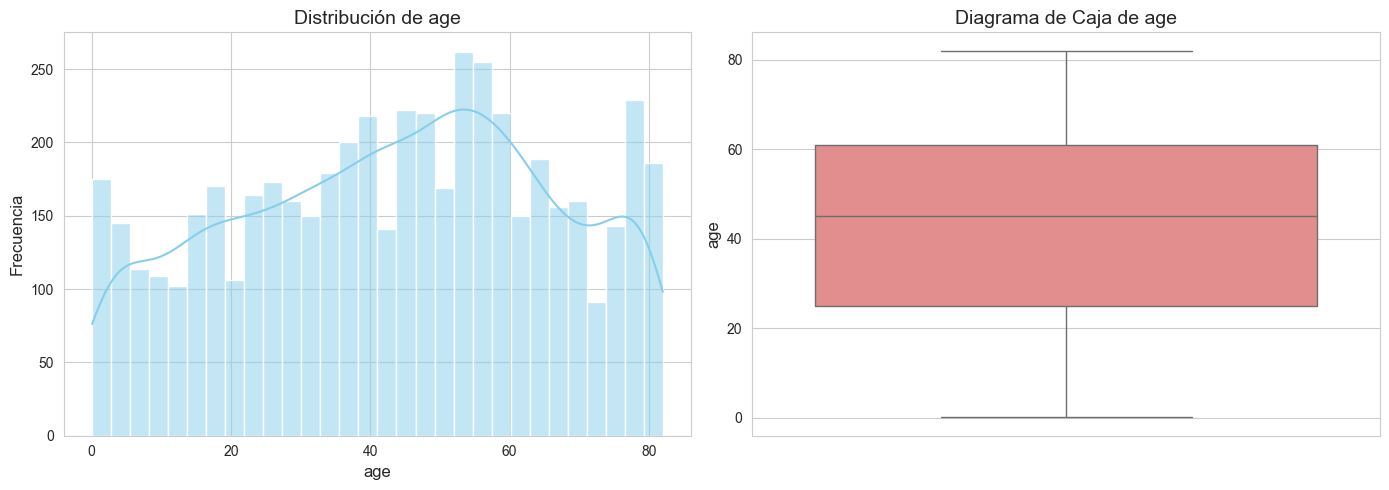

Estadísticas descriptivas para age:
count   5109.000
mean      43.230
std       22.614
min        0.080
25%       25.000
50%       45.000
75%       61.000
max       82.000
Name: age, dtype: float64
------------------------------------------------------------


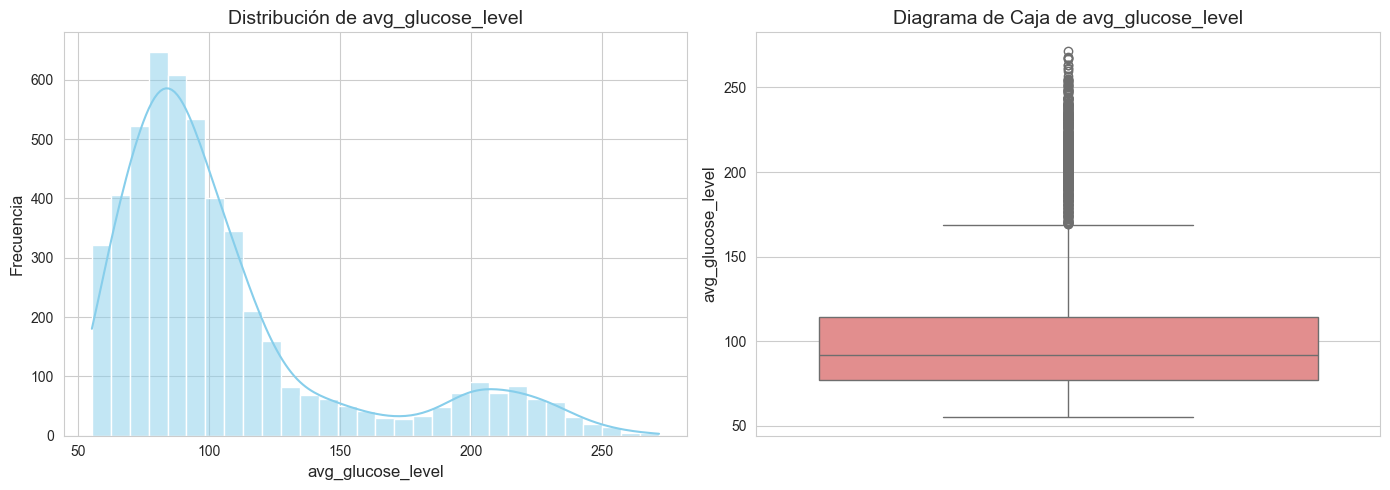

Estadísticas descriptivas para avg_glucose_level:
count   5109.000
mean     106.140
std       45.285
min       55.120
25%       77.240
50%       91.880
75%      114.090
max      271.740
Name: avg_glucose_level, dtype: float64
------------------------------------------------------------


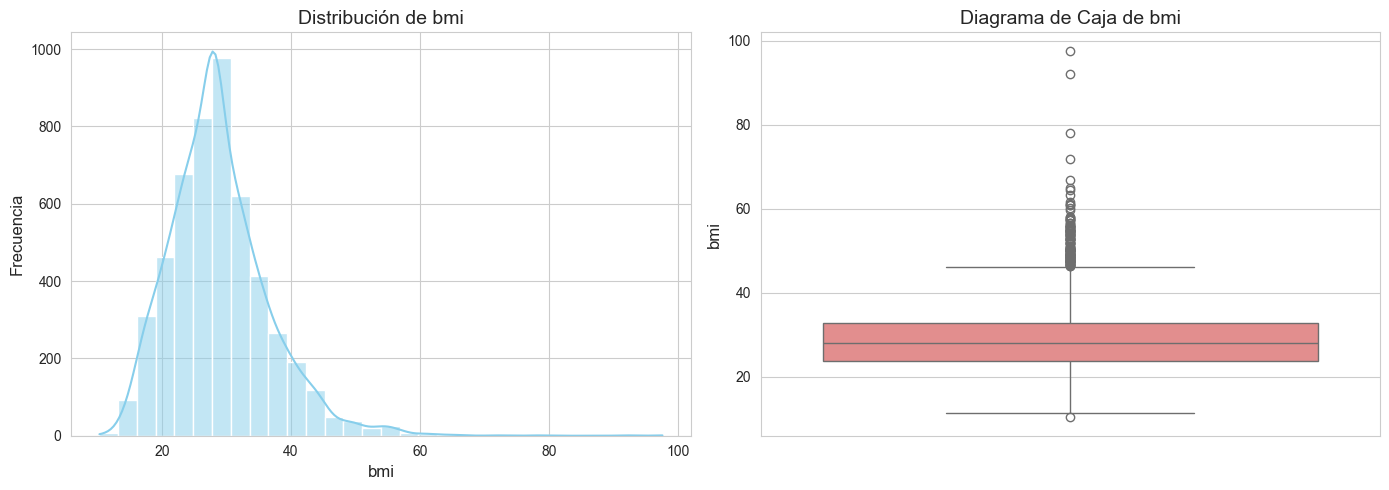

Estadísticas descriptivas para bmi:
count   5109.000
mean      28.863
std        7.700
min       10.300
25%       23.800
50%       28.100
75%       32.800
max       97.600
Name: bmi, dtype: float64
------------------------------------------------------------


In [17]:
if not df.empty:
    numerical_features = ['age', 'avg_glucose_level', 'bmi']

    for feature in numerical_features:
        if feature in df.columns:
            plt.figure(figsize=(14, 5))
            
            plt.subplot(1, 2, 1)
            sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
            plt.title(f'Distribución de {feature}', fontsize=14)
            plt.xlabel(feature, fontsize=12)
            plt.ylabel('Frecuencia', fontsize=12)
            
            plt.subplot(1, 2, 2)
            sns.boxplot(y=df[feature], color='lightcoral')
            plt.title(f'Diagrama de Caja de {feature}', fontsize=14)
            plt.ylabel(feature, fontsize=12)
            
            plt.tight_layout()
            plt.show()
            
            print(f"Estadísticas descriptivas para {feature}:")
            print(df[feature].describe())
            print("-" * 60)
        else:
            print(f"La columna '{feature}' no se encontró en el DataFrame.")
else:
    print("DataFrame vacío. No se puede realizar el análisis univariado de variables numéricas.")

#### 5.2.2. Variables Categóricas

C:\Users\Omar\AppData\Local\Temp\ipykernel_33340\994597741.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=feature, data=df, order=df[feature].value_counts().index, palette='viridis')


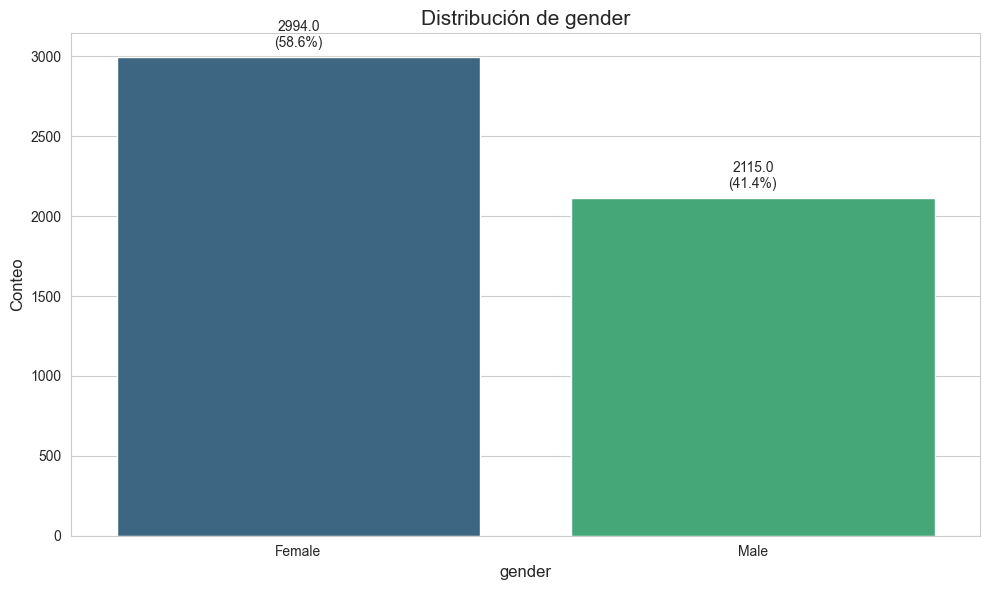

Valores porcentuales para gender:
gender
Female   58.602
Male     41.398
Name: proportion, dtype: float64
------------------------------------------------------------


C:\Users\Omar\AppData\Local\Temp\ipykernel_33340\994597741.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=feature, data=df, order=df[feature].value_counts().index, palette='viridis')


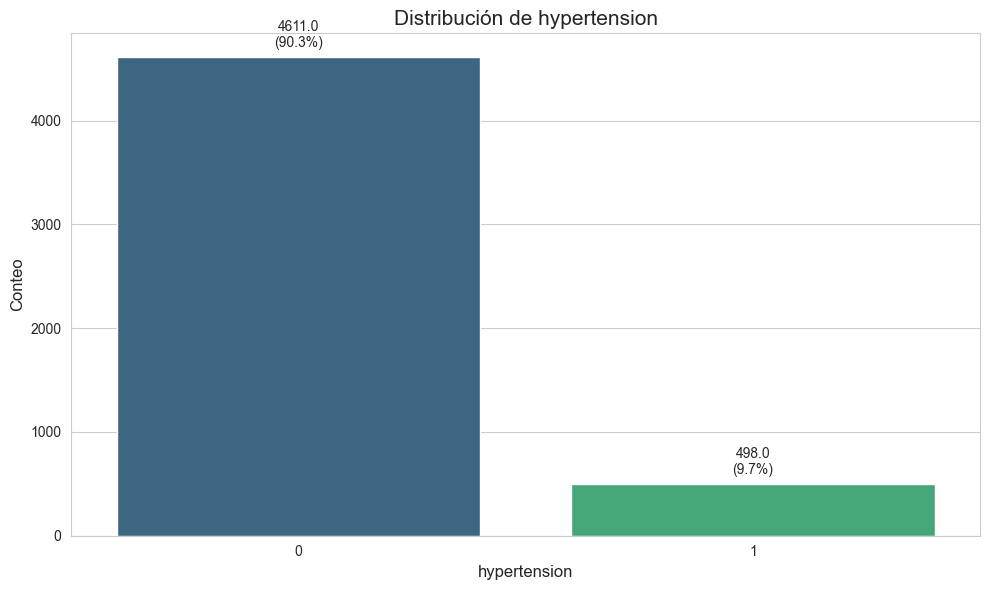

Valores porcentuales para hypertension:
hypertension
0   90.252
1    9.748
Name: proportion, dtype: float64
------------------------------------------------------------


C:\Users\Omar\AppData\Local\Temp\ipykernel_33340\994597741.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=feature, data=df, order=df[feature].value_counts().index, palette='viridis')


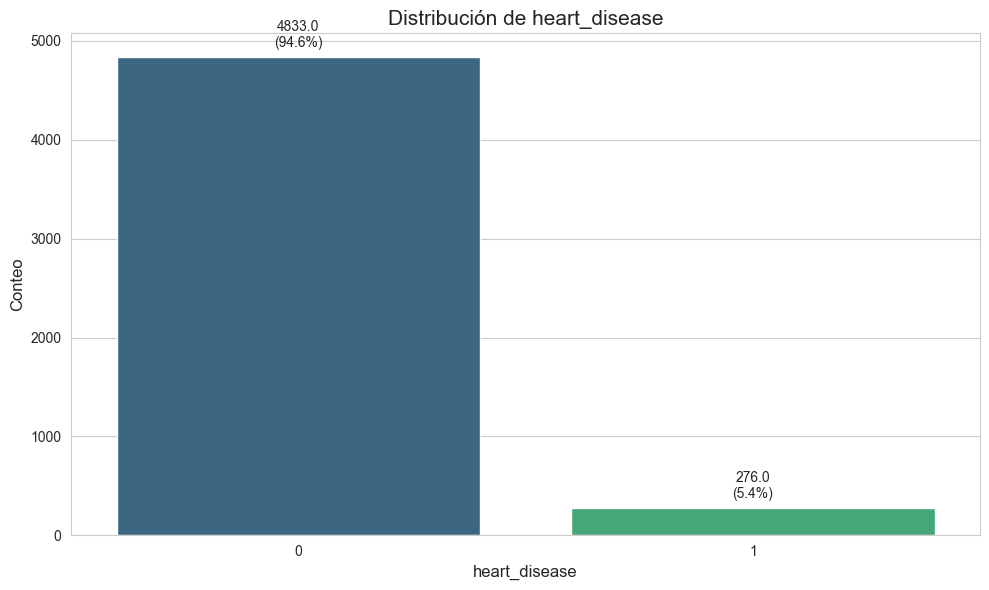

Valores porcentuales para heart_disease:
heart_disease
0   94.598
1    5.402
Name: proportion, dtype: float64
------------------------------------------------------------


C:\Users\Omar\AppData\Local\Temp\ipykernel_33340\994597741.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=feature, data=df, order=df[feature].value_counts().index, palette='viridis')


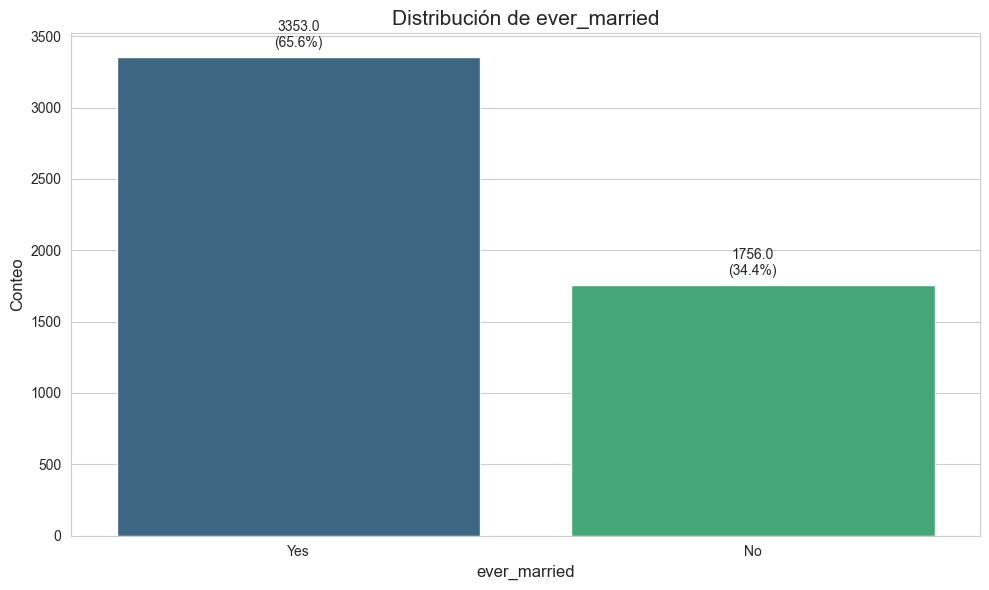

Valores porcentuales para ever_married:
ever_married
Yes   65.629
No    34.371
Name: proportion, dtype: float64
------------------------------------------------------------


C:\Users\Omar\AppData\Local\Temp\ipykernel_33340\994597741.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=feature, data=df, order=df[feature].value_counts().index, palette='viridis')


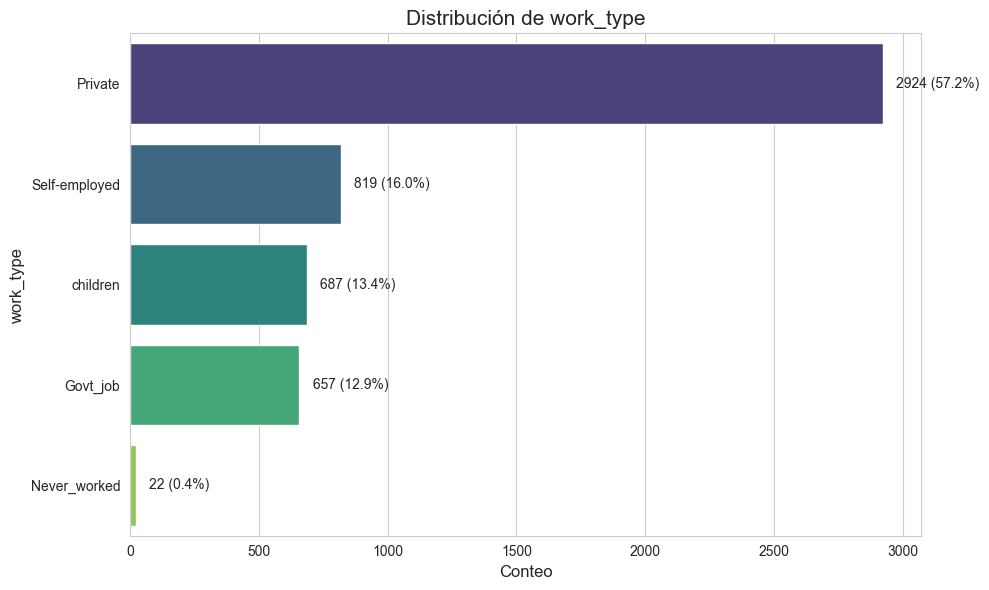

Valores porcentuales para work_type:
work_type
Private         57.232
Self-employed   16.031
children        13.447
Govt_job        12.860
Never_worked     0.431
Name: proportion, dtype: float64
------------------------------------------------------------


C:\Users\Omar\AppData\Local\Temp\ipykernel_33340\994597741.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=feature, data=df, order=df[feature].value_counts().index, palette='viridis')


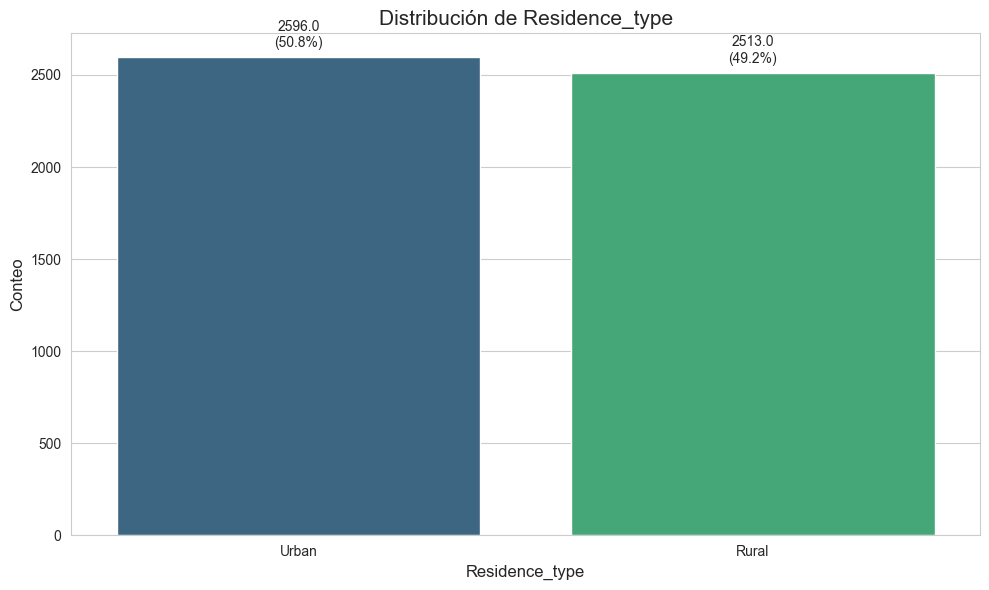

Valores porcentuales para Residence_type:
Residence_type
Urban   50.812
Rural   49.188
Name: proportion, dtype: float64
------------------------------------------------------------


C:\Users\Omar\AppData\Local\Temp\ipykernel_33340\994597741.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=feature, data=df, order=df[feature].value_counts().index, palette='viridis')


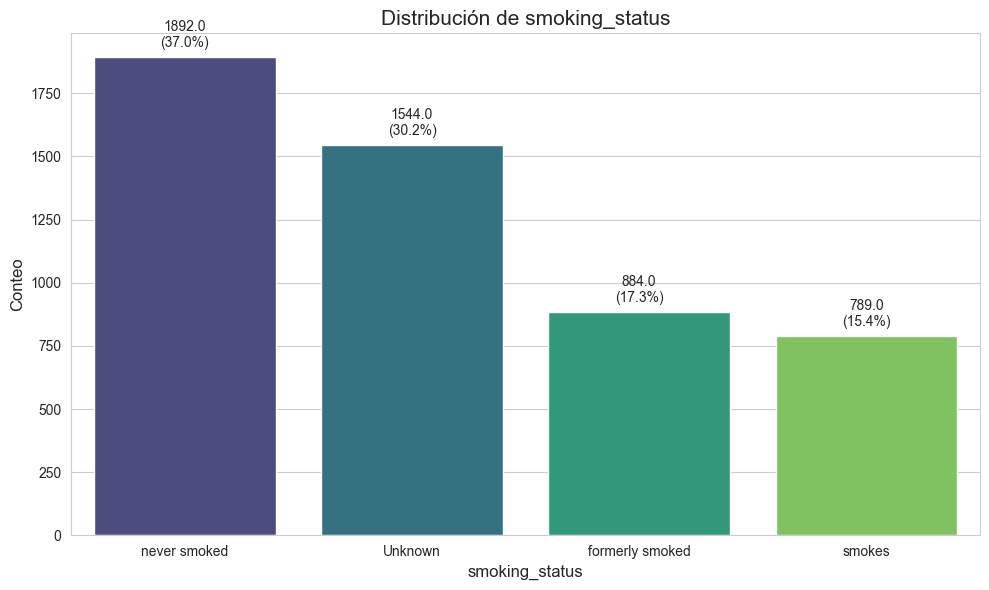

Valores porcentuales para smoking_status:
smoking_status
never smoked      37.033
Unknown           30.221
formerly smoked   17.303
smokes            15.443
Name: proportion, dtype: float64
------------------------------------------------------------


In [18]:
if not df.empty:
    categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                            'work_type', 'Residence_type', 'smoking_status']

    for feature in categorical_features:
        if feature in df.columns:
            plt.figure(figsize=(10, 6))
            # Usar y=feature para barras horizontales si hay muchas categorías o nombres largos
            # Usar x=feature para barras verticales si hay pocas categorías
            if df[feature].nunique() > 4 : # Umbral para decidir si la gráfica es horizontal o vertical
                 ax = sns.countplot(y=feature, data=df, order=df[feature].value_counts().index, palette='viridis')
                 plt.xlabel('Conteo', fontsize=12)
                 plt.ylabel(feature, fontsize=12)
                 # Añadir conteos/porcentajes en las barras horizontales
                 for p in ax.patches:
                     width = p.get_width()
                     plt.text(width + 0.01*df.shape[0] , # Posición X ligeramente después de la barra
                              p.get_y() + p.get_height() / 2,
                              f'{int(width)} ({width/len(df)*100:.1f}%)',
                              va='center')
            else:
                ax = sns.countplot(x=feature, data=df, order=df[feature].value_counts().index, palette='viridis')
                plt.xlabel(feature, fontsize=12)
                plt.ylabel('Conteo', fontsize=12)
                # Añadir conteos/porcentajes en las barras verticales
                total = len(df[feature])
                for p in ax.patches:
                    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
                    x_bar = p.get_x() + p.get_width() / 2
                    y_bar = p.get_height()
                    ax.annotate(f'{p.get_height()}\n({percentage})', (x_bar, y_bar), 
                                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

            plt.title(f'Distribución de {feature}', fontsize=15)
            plt.tight_layout()
            plt.show()
            
            print(f"Valores porcentuales para {feature}:")
            print(df[feature].value_counts(normalize=True) * 100)
            print("-" * 60)
        else:
            print(f"La columna '{feature}' no se encontró en el DataFrame.")
else:
    print("DataFrame vacío. No se puede realizar el análisis univariado de variables categóricas.")

#### 5.3. Análisis Bivariado

#### 5.3.1. Variables Numéricas vs. `stroke`

C:\Users\Omar\AppData\Local\Temp\ipykernel_33340\4058497412.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=feature, data=df, palette=['#66b3ff','#ff9999'])


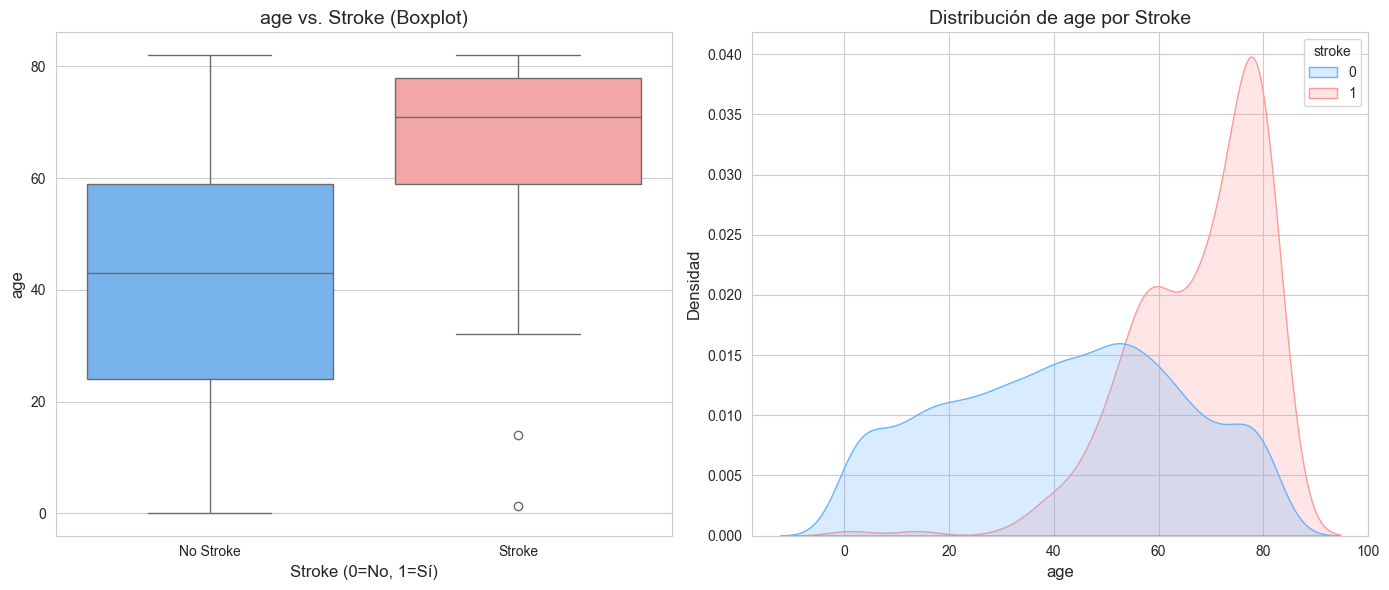

Comparación de 'age' para Stroke vs No-Stroke:
  Media 'age' (Stroke=1): 67.73
  Media 'age' (Stroke=0): 41.97
  P-valor del t-test de Welch: 2.1758e-95
  -> Diferencia estadísticamente SIGNIFICATIVA para 'age'.
----------------------------------------------------------------------


C:\Users\Omar\AppData\Local\Temp\ipykernel_33340\4058497412.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=feature, data=df, palette=['#66b3ff','#ff9999'])


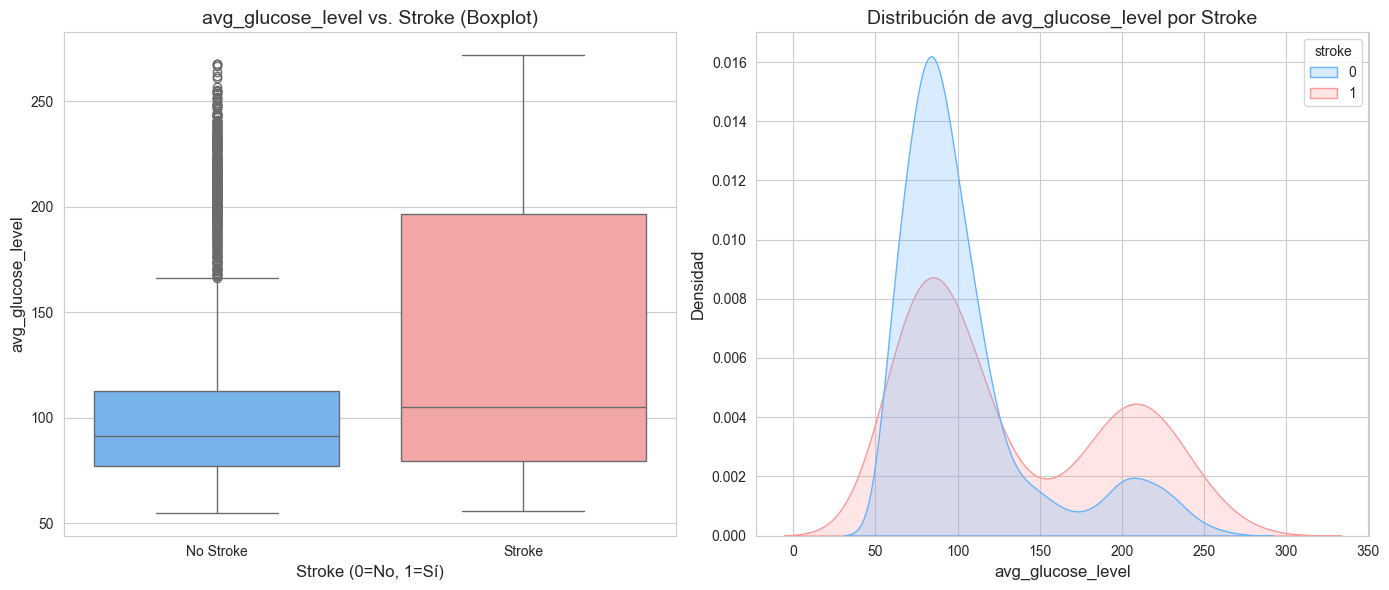

Comparación de 'avg_glucose_level' para Stroke vs No-Stroke:
  Media 'avg_glucose_level' (Stroke=1): 132.54
  Media 'avg_glucose_level' (Stroke=0): 104.79
  P-valor del t-test de Welch: 2.3731e-11
  -> Diferencia estadísticamente SIGNIFICATIVA para 'avg_glucose_level'.
----------------------------------------------------------------------


C:\Users\Omar\AppData\Local\Temp\ipykernel_33340\4058497412.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=feature, data=df, palette=['#66b3ff','#ff9999'])


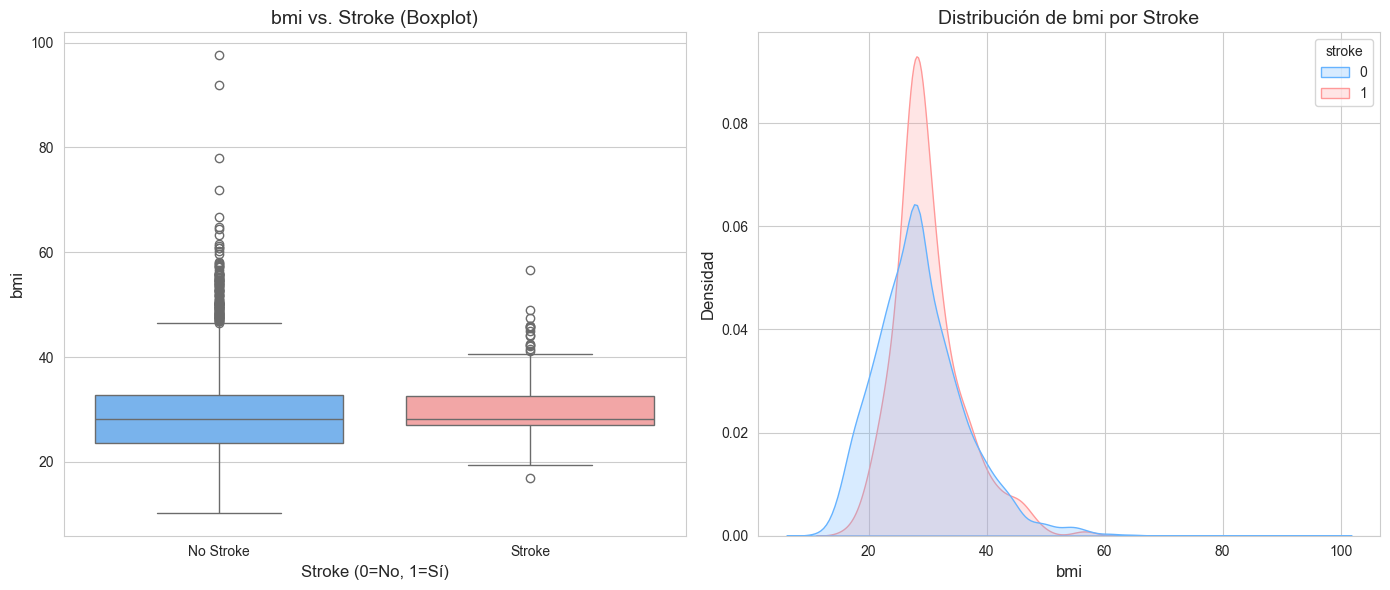

Comparación de 'bmi' para Stroke vs No-Stroke:
  Media 'bmi' (Stroke=1): 30.09
  Media 'bmi' (Stroke=0): 28.80
  P-valor del t-test de Welch: 9.9379e-04
  -> Diferencia estadísticamente SIGNIFICATIVA para 'bmi'.
----------------------------------------------------------------------


In [19]:
if not df.empty and 'stroke' in df.columns:
    for feature in numerical_features:
        if feature in df.columns:
            plt.figure(figsize=(14, 6))
            
            # Boxplot
            plt.subplot(1, 2, 1)
            sns.boxplot(x='stroke', y=feature, data=df, palette=['#66b3ff','#ff9999'])
            plt.title(f'{feature} vs. Stroke (Boxplot)', fontsize=14)
            plt.xlabel('Stroke (0=No, 1=Sí)', fontsize=12)
            plt.xticks([0,1], ['No Stroke', 'Stroke'])
            plt.ylabel(feature, fontsize=12)
            
            # KDE plot (distribución)
            plt.subplot(1, 2, 2)
            sns.kdeplot(data=df, x=feature, hue='stroke', fill=True, common_norm=False, palette=['#66b3ff','#ff9999'])
            plt.title(f'Distribución de {feature} por Stroke', fontsize=14)
            plt.xlabel(feature, fontsize=12)
            plt.ylabel('Densidad', fontsize=12)
            
            plt.tight_layout()
            plt.show()
            
            # Realizar una prueba t para comparar medias (asumiendo varianzas no necesariamente iguales)
            if df['stroke'].nunique() == 2: # Asegurar que hay dos grupos para comparar
                stroke_yes = df[df['stroke'] == 1][feature].dropna()
                stroke_no = df[df['stroke'] == 0][feature].dropna()
                
                if len(stroke_yes) > 1 and len(stroke_no) > 1: # t-test necesita al menos 2 muestras por grupo
                    stat, p_val = ttest_ind(stroke_yes, stroke_no, equal_var=False) # Welch's t-test
                    print(f"Comparación de '{feature}' para Stroke vs No-Stroke:")
                    print(f"  Media '{feature}' (Stroke=1): {stroke_yes.mean():.2f}")
                    print(f"  Media '{feature}' (Stroke=0): {stroke_no.mean():.2f}")
                    print(f"  P-valor del t-test de Welch: {p_val:.4e}") # Usar notación científica para p-valores pequeños
                    if p_val < 0.05:
                        print(f"  -> Diferencia estadísticamente SIGNIFICATIVA para '{feature}'.")
                    else:
                        print(f"  -> Diferencia estadísticamente NO significativa para '{feature}'.")
                else:
                    print(f"  No hay suficientes datos en ambos grupos de 'stroke' para realizar un t-test para '{feature}'.")
            print("-" * 70)
        else:
            print(f"La columna '{feature}' no se encontró en el DataFrame.")
else:
    print("DataFrame vacío o columna 'stroke' no encontrada.")

#### 5.3.2. Variables Categóricas vs. `stroke`

Porcentaje de ACV por categoría de 'gender':


stroke,No_Stroke_%,Stroke_%
gender,,
Female,95.291,4.709
Male,94.894,5.106


C:\Users\Omar\AppData\Local\Temp\ipykernel_33340\485059793.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ctab.index, y='Stroke_%', data=ctab.reset_index(), palette='summer')


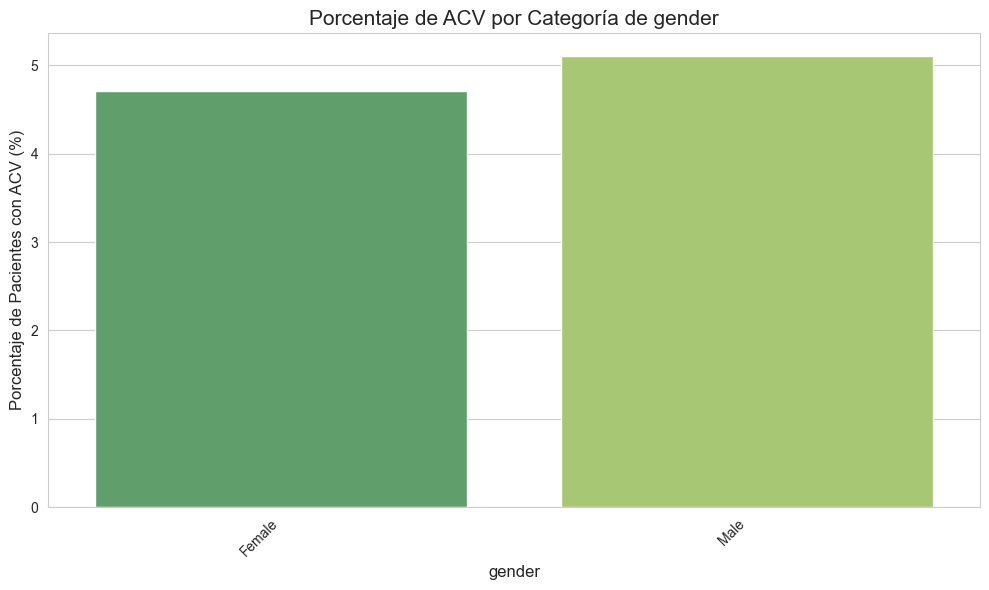

----------------------------------------------------------------------
Porcentaje de ACV por categoría de 'hypertension':


stroke,No_Stroke_%,Stroke_%
hypertension,,
0,96.031,3.969
1,86.747,13.253


C:\Users\Omar\AppData\Local\Temp\ipykernel_33340\485059793.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ctab.index, y='Stroke_%', data=ctab.reset_index(), palette='summer')


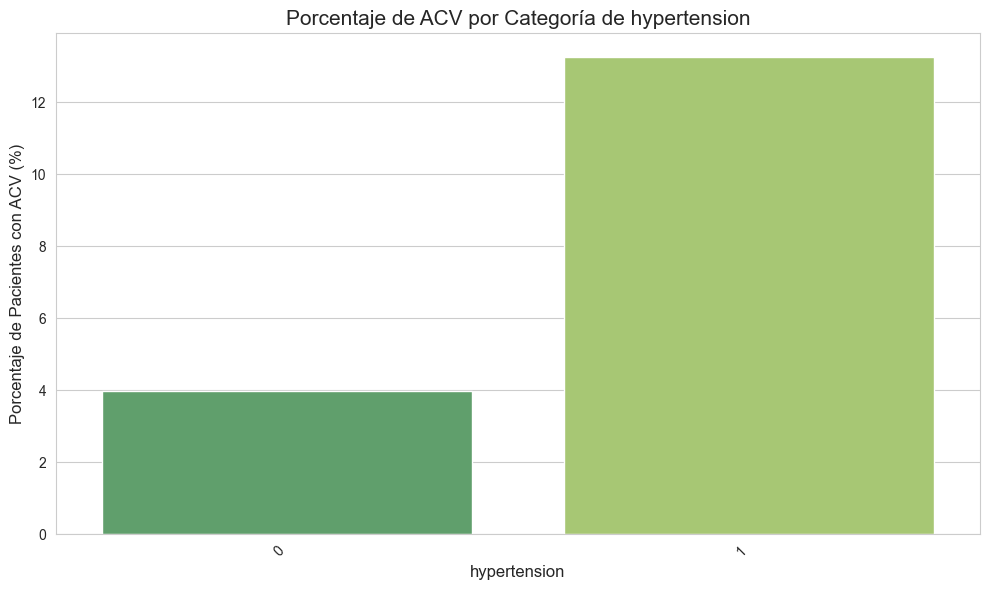

----------------------------------------------------------------------
Porcentaje de ACV por categoría de 'heart_disease':


stroke,No_Stroke_%,Stroke_%
heart_disease,,
0,95.820,4.180
1,82.971,17.029


C:\Users\Omar\AppData\Local\Temp\ipykernel_33340\485059793.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ctab.index, y='Stroke_%', data=ctab.reset_index(), palette='summer')


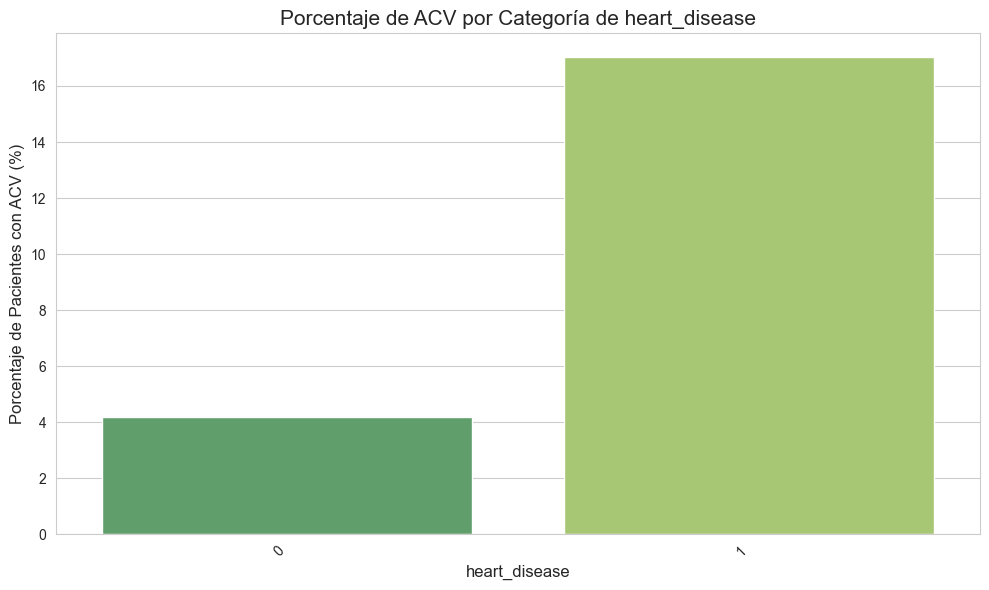

----------------------------------------------------------------------
Porcentaje de ACV por categoría de 'ever_married':


stroke,No_Stroke_%,Stroke_%
ever_married,,
No,98.349,1.651
Yes,93.439,6.561


C:\Users\Omar\AppData\Local\Temp\ipykernel_33340\485059793.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ctab.index, y='Stroke_%', data=ctab.reset_index(), palette='summer')


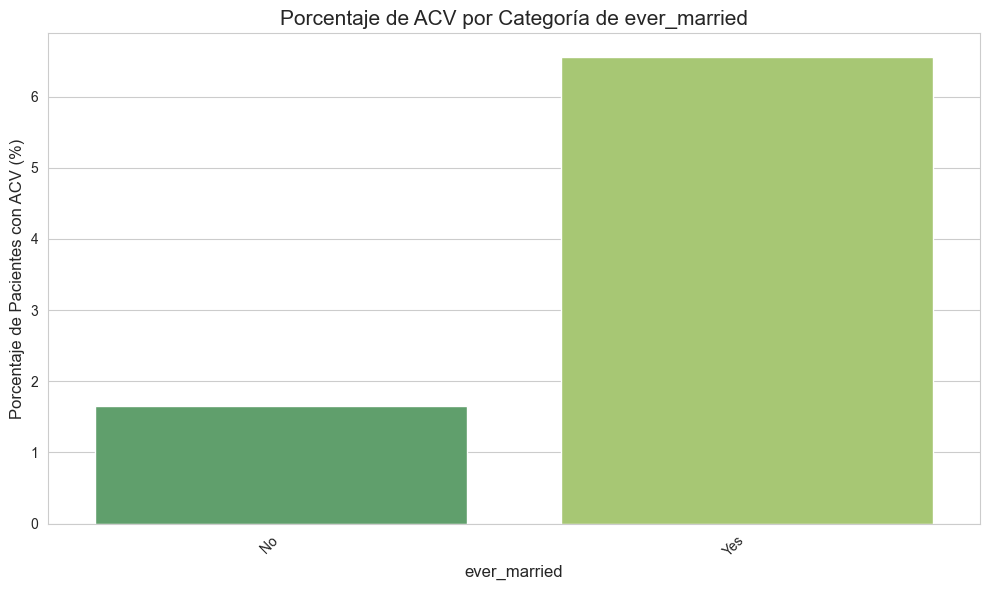

----------------------------------------------------------------------
Porcentaje de ACV por categoría de 'work_type':


stroke,No_Stroke_%,Stroke_%
work_type,,
Govt_job,94.977,5.023
Never_worked,100.000,0.000
Private,94.904,5.096
Self-employed,92.063,7.937
children,99.709,0.291


C:\Users\Omar\AppData\Local\Temp\ipykernel_33340\485059793.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ctab.index, y='Stroke_%', data=ctab.reset_index(), palette='summer')


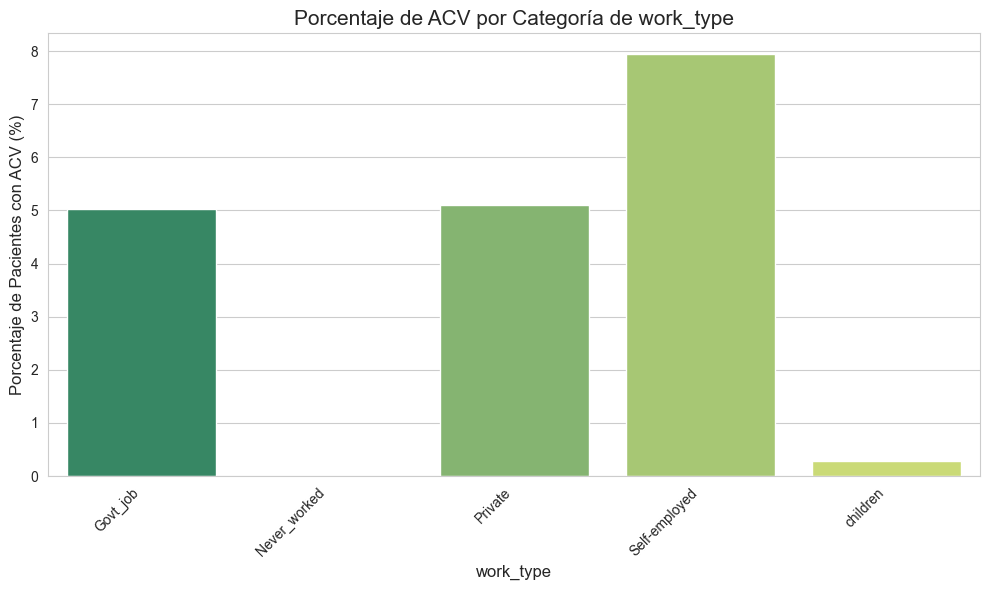

----------------------------------------------------------------------
Porcentaje de ACV por categoría de 'Residence_type':


stroke,No_Stroke_%,Stroke_%
Residence_type,,
Rural,95.464,4.536
Urban,94.800,5.200


C:\Users\Omar\AppData\Local\Temp\ipykernel_33340\485059793.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ctab.index, y='Stroke_%', data=ctab.reset_index(), palette='summer')


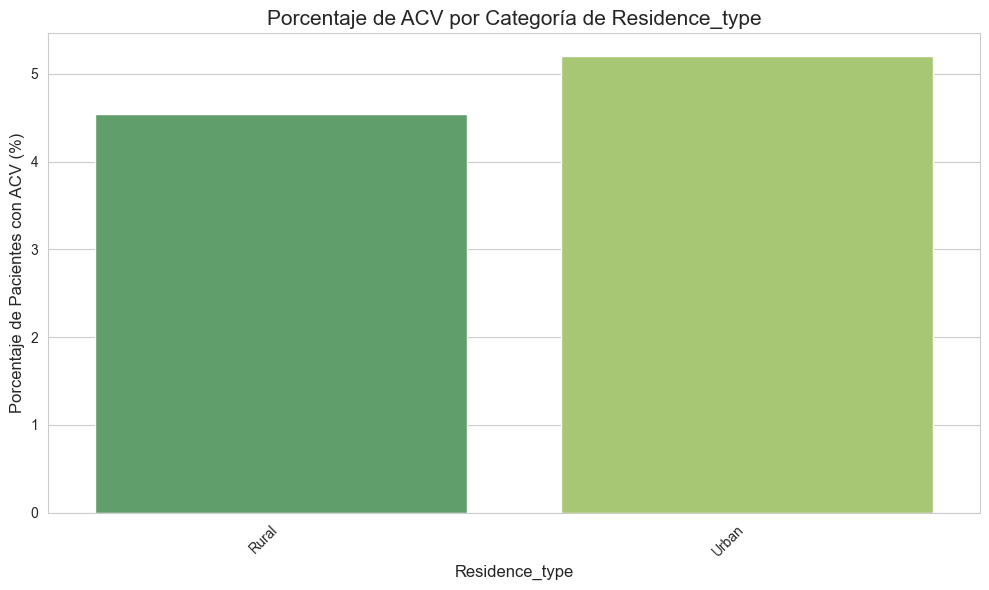

----------------------------------------------------------------------
Porcentaje de ACV por categoría de 'smoking_status':


stroke,No_Stroke_%,Stroke_%
smoking_status,,
Unknown,96.956,3.044
formerly smoked,92.081,7.919
never smoked,95.243,4.757
smokes,94.677,5.323


C:\Users\Omar\AppData\Local\Temp\ipykernel_33340\485059793.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ctab.index, y='Stroke_%', data=ctab.reset_index(), palette='summer')


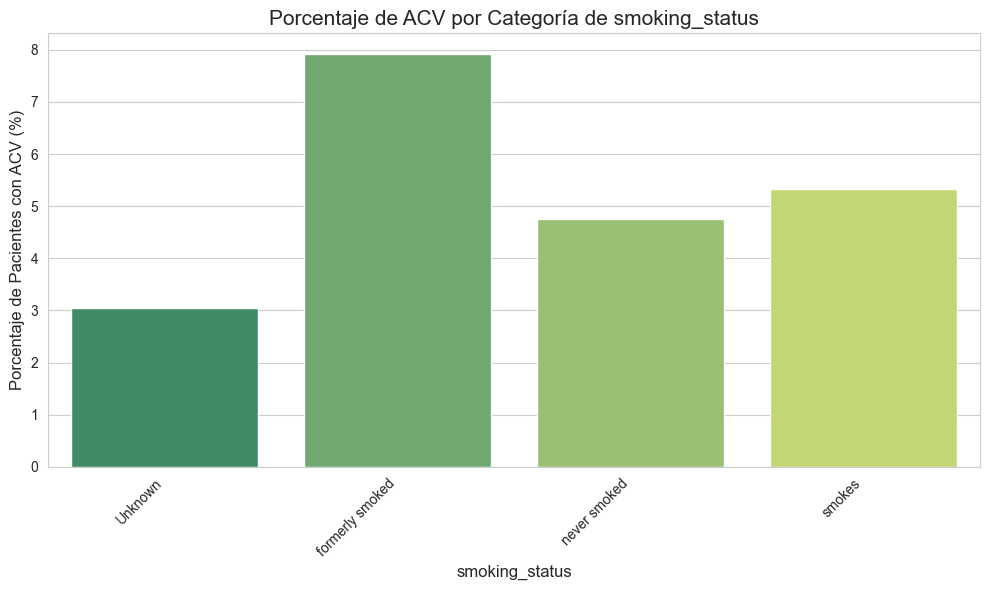

----------------------------------------------------------------------


In [20]:
if not df.empty and 'stroke' in df.columns:
    for feature in categorical_features:
        if feature in df.columns:
            # Crear tabla de contingencia para calcular porcentajes de ACV por categoría
            ctab = pd.crosstab(df[feature], df['stroke'], normalize='index') * 100
            ctab = ctab.rename(columns={0: 'No_Stroke_%', 1: 'Stroke_%'})
            
            print(f"Porcentaje de ACV por categoría de '{feature}':")
            display(ctab) # Mostrar la tabla

            # Gráfico de barras del porcentaje de ACV (stroke=1)
            plt.figure(figsize=(10, 6))
            # Asegurarse de que la columna 'Stroke_%' existe (por si solo hay una clase de stroke)
            if 'Stroke_%' in ctab.columns:
                sns.barplot(x=ctab.index, y='Stroke_%', data=ctab.reset_index(), palette='summer')
                plt.title(f'Porcentaje de ACV por Categoría de {feature}', fontsize=15)
                plt.ylabel('Porcentaje de Pacientes con ACV (%)', fontsize=12)
                plt.xlabel(feature, fontsize=12)
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
            else:
                 print(f"No se pueden graficar porcentajes de ACV para '{feature}' (posiblemente solo existe una clase de 'stroke' en los datos filtrados).")
            print("-" * 70)
        else:
            print(f"La columna '{feature}' no se encontró en el DataFrame.")
else:
    print("DataFrame vacío o columna 'stroke' no encontrada.")

### 5.4. Análisis Multivariado (Correlaciones)

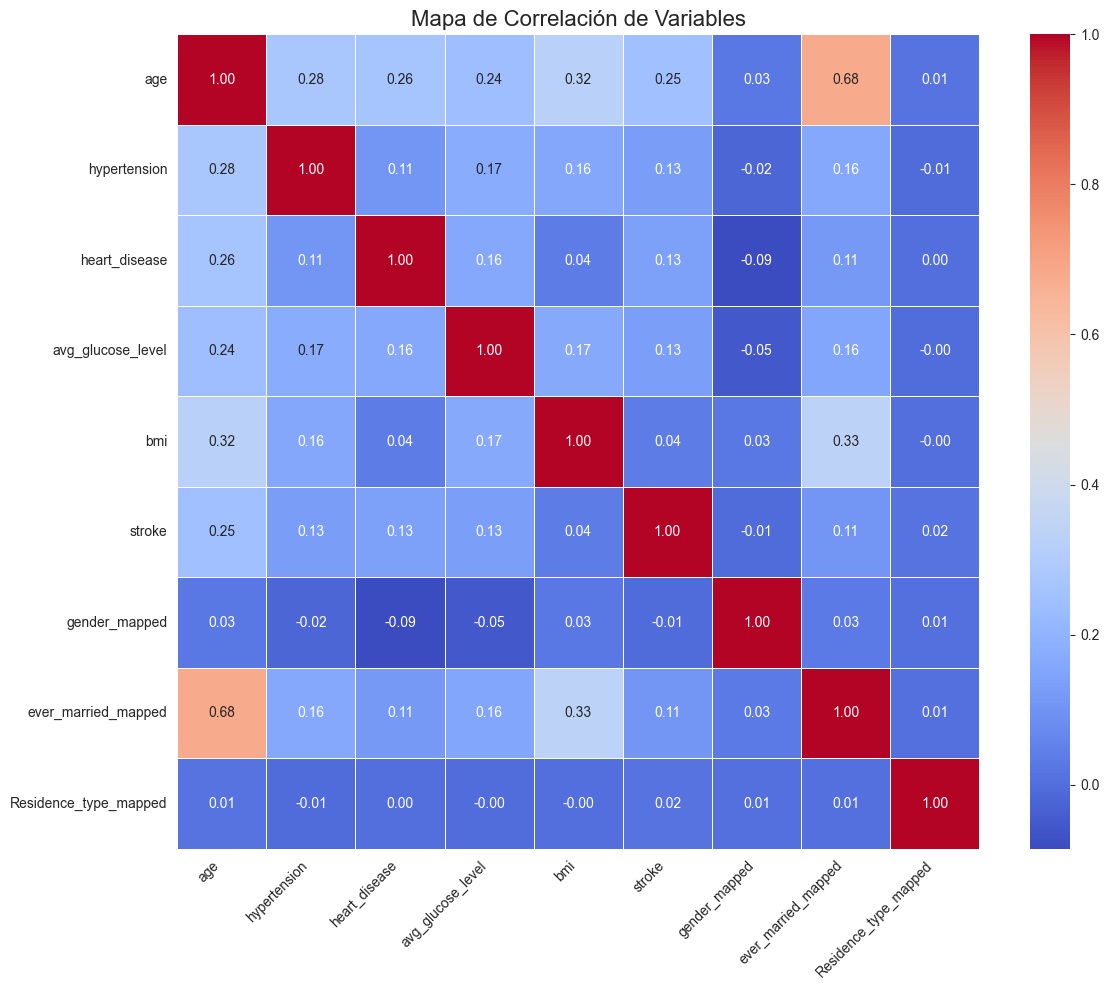

In [21]:
if not df.empty:
    df_corr = df.copy()

    # Mapeo simple para algunas variables categóricas (convirtiéndolas a numéricas para la matriz de correlación)
    # Para variables con más de 2 categorías, One-Hot Encoding sería lo ideal antes de modelar,
    # pero para una visualización rápida de correlación, Label Encoding puede dar una idea.
    # Aquí solo mapeamos las binarias o casi binarias para simplificar
    
    if 'gender' in df_corr.columns:
        df_corr['gender_mapped'] = df_corr['gender'].map({'Male': 0, 'Female': 1})
    if 'ever_married' in df_corr.columns:
        df_corr['ever_married_mapped'] = df_corr['ever_married'].map({'No': 0, 'Yes': 1})
    if 'Residence_type' in df_corr.columns:
        df_corr['Residence_type_mapped'] = df_corr['Residence_type'].map({'Rural': 0, 'Urban': 1})

    # Seleccionar solo columnas numéricas (originales y las recién mapeadas)
    numerical_cols_for_corr = df_corr.select_dtypes(include=np.number).columns
    
    plt.figure(figsize=(12, 10))
    correlation_matrix = df_corr[numerical_cols_for_corr].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=True)
    plt.title('Mapa de Correlación de Variables', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame vacío. No se puede generar la matriz de correlación.")